In [1]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from python_functions.modues import StandardizerTrainTest, resampling, XGBmodelfit, tplot, timeplot
import seaborn as sns
from sklearn.utils import resample
import pickle
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [22]:
with open('auc_bootstrap_LR.pickle', 'rb') as handle:
    auc_bootstrap_LR = pickle.load(handle)
with open('recall_bootstrap_LR.pickle', 'rb') as handle:
    recall_bootstrap_LR = pickle.load(handle)
with open('accuracy_bootstrap_LR.pickle', 'rb') as handle:
    accuracy_bootstrap_LR = pickle.load(handle)
with open('AUC_LR.pickle', 'rb') as handle:
    AUC_LR = pickle.load(handle)
with open('Accuracyvalue_LR.pickle', 'rb') as handle:
    Accuracyvalue_LR = pickle.load(handle)
with open('Recallvalue_LR.pickle', 'rb') as handle:
    Recallvalue_LR = pickle.load(handle)
with open('auc_bootstrap_RF.pickle', 'rb') as handle:
    auc_bootstrap_RF = pickle.load(handle)
with open('recall_bootstrap_RF.pickle', 'rb') as handle:
    recall_bootstrap_RF = pickle.load(handle)
with open('accuracy_bootstrap_RF.pickle', 'rb') as handle:
    accuracy_bootstrap_RF = pickle.load(handle)
with open('AUC_RF.pickle', 'rb') as handle:
    AUC_RF = pickle.load(handle)
with open('Accuracyvalue_RF.pickle', 'rb') as handle:
    Accuracyvalue_RF = pickle.load(handle)
with open('Recallvalue_RF.pickle', 'rb') as handle:
    Recallvalue_RF = pickle.load(handle)
with open('auc_bootstrap_xgb.pickle', 'rb') as handle:
    auc_bootstrap_xgb = pickle.load(handle)
with open('recall_bootstrap_xgb.pickle', 'rb') as handle:
    recall_bootstrap_xgb = pickle.load(handle)
with open('accuracy_bootstrap_xgb.pickle', 'rb') as handle:
    accuracy_bootstrap_xgb = pickle.load(handle)
with open('AUC_xgb.pickle', 'rb') as handle:
    AUC_xgb = pickle.load(handle)
with open('Accuracyvalue_xgb.pickle', 'rb') as handle:
    Accuracyvalue_xgb = pickle.load(handle)
with open('Recallvalue_xgb.pickle', 'rb') as handle:
    Recallvalue_xgb = pickle.load(handle)
with open('auc_bootstrap_LR_ada.pickle', 'rb') as handle:
    auc_bootstrap_LR_ada = pickle.load(handle)
with open('recall_bootstrap_LR_ada.pickle', 'rb') as handle:
    recall_bootstrap_LR_ada = pickle.load(handle)
with open('accuracy_bootstrap_LR_ada.pickle', 'rb') as handle:
    accuracy_bootstrap_LR_ada = pickle.load(handle)
with open('AUC_LR_ada.pickle', 'rb') as handle:
    AUC_LR_ada = pickle.load(handle)
with open('Accuracyvalue_LR_ada.pickle', 'rb') as handle:
    Accuracyvalue_LR_ada = pickle.load(handle)
with open('Recallvalue_LR_ada.pickle', 'rb') as handle:
    Recallvalue_LR_ada = pickle.load(handle)

In [23]:
axis = ['2019.12','2020.01', '2020.02', '2020.07', '2020.08', '2020.09', '2020.10', '2020.11']
df = pd.DataFrame({"Time":axis, "AUC_RF":AUC_RF, "AUC_XGB":AUC_xgb, "AUC_LR":AUC_LR, 'AUC_LR_ADASYN':AUC_LR_ada, 
     "recall_RF":Recallvalue_RF, "recall_XGB":Recallvalue_xgb,
     "recall_LR":Recallvalue_LR ,'recall_LR_ADASYN':Recallvalue_LR_ada,
    "accuracy_RF":Accuracyvalue_RF, "accuracy_XGB":Accuracyvalue_xgb, "accuracy_LR":Accuracyvalue_LR,
    'accuracy_LR_ADASYN': Accuracyvalue_LR_ada
    })
df.to_csv("TimeSeriesResults.csv", index=False)

In [24]:
alpha = 0.95
xaxis = ['2019_12','2020_1', '2020_2', '2020_7', '2020_8', '2020_9', '2020_10', '2020_11']
plotdata = {}
plotdata['Date'] = xaxis
for data, name in zip([auc_bootstrap_LR, accuracy_bootstrap_LR_ada, auc_bootstrap_RF, auc_bootstrap_xgb], 
                      ['LR', 'LR ADA', 'RF','XGB']): 
    varList = []
    for i in data.keys():
        stats = data[i]
        varList.append(np.std(stats).round(3))
    plotdata[f"{name} Std."] = np.array(varList)
plotdata = pd.DataFrame(plotdata)
plotdata['monthly mean'] = plotdata[['LR Std.', 'LR ADA Std.', 'RF Std.', 'XGB Std.']].mean(axis = 1).round(3)
plotdata

,Date,LR Std.,LR ADA Std.,RF Std.,XGB Std.,monthly mean
0,2019_12,0.037,0.017,0.041,0.057,0.038
1,2020_1,0.032,0.011,0.031,0.031,0.026
2,2020_2,0.022,0.011,0.022,0.020,0.019
3,2020_7,0.027,0.015,0.028,0.029,0.025
4,2020_8,0.020,0.009,0.015,0.015,0.015
5,2020_9,0.020,0.009,0.018,0.017,0.016
6,2020_10,0.046,0.014,0.042,0.046,0.037
7,2020_11,0.031,0.015,0.032,0.031,0.027


In [25]:
overallStdLR = np.array(pd.DataFrame(auc_bootstrap_LR)).reshape((-1,1)).std().round(3)
overallStdLRADA = np.array(pd.DataFrame(auc_bootstrap_LR_ada)).reshape((-1,1)).std().round(3)
overallStdRF = np.array(pd.DataFrame(auc_bootstrap_RF)).reshape((-1,1)).std().round(3)
overallStdXGB = np.array(pd.DataFrame(auc_bootstrap_xgb)).reshape((-1,1)).std().round(3)

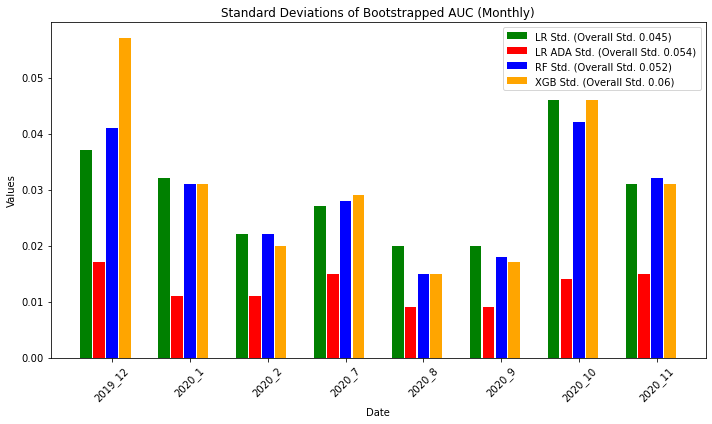

In [26]:
df = plotdata
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the bars
x = np.arange(len(df))
widthplot = 0.15
jitter = widthplot*1.1
plt.bar(x - 2*jitter, df['LR Std.'], label=f'LR Std. (Overall Std. {overallStdLR})', color='green', width=widthplot)
plt.bar(x - jitter, df['LR ADA Std.'], label=f'LR ADA Std. (Overall Std. {overallStdLRADA})', color='red', width=widthplot)
plt.bar(x, df['RF Std.'], label=f'RF Std. (Overall Std. {overallStdRF})', color='blue', width=widthplot)
plt.bar(x + jitter, df['XGB Std.'], label=f'XGB Std. (Overall Std. {overallStdXGB})', color='orange', width=widthplot)

# Set x-axis tick labels
plt.xticks(x, df['Date'], rotation=45)
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Standard Deviations of Bootstrapped AUC (Monthly)')
# Add legend
plt.legend()
# Show the plot
plt.tight_layout()
plt.savefig("./figures/bootstrapStd.png")

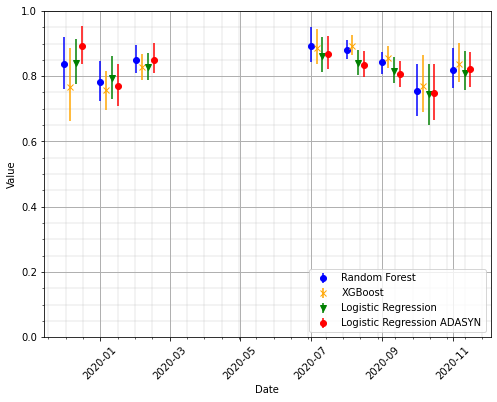

In [27]:
xaxis = ['2019_12','2020_1', '2020_2', '2020_7', '2020_8', '2020_9', '2020_10', '2020_11']
tplot(xaxis, AUC_RF, AUC_xgb, AUC_LR, AUC_LR_ada, 0.95, auc_bootstrap_LR, auc_bootstrap_RF, auc_bootstrap_xgb,
     auc_bootstrap_LR_ada, "./figures/TimeAUCBoot.png")

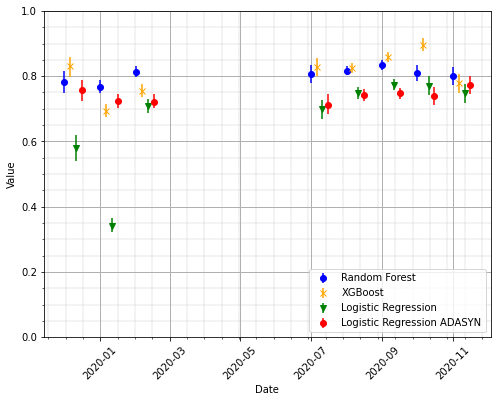

In [28]:
tplot(xaxis, Accuracyvalue_RF, Accuracyvalue_xgb, Accuracyvalue_LR, Accuracyvalue_LR_ada, 0.95,
      accuracy_bootstrap_LR, accuracy_bootstrap_RF, accuracy_bootstrap_xgb, accuracy_bootstrap_LR_ada, 
     "./figures/TimeaccuracyBoot.png")

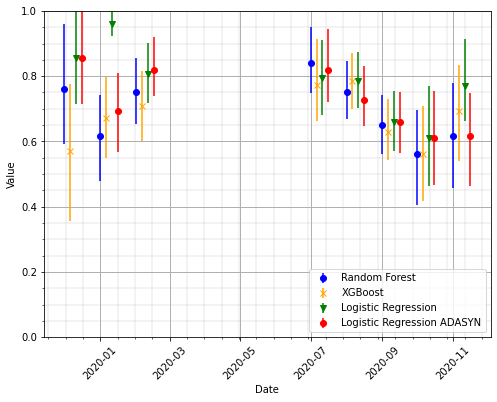

In [29]:
tplot(xaxis,Recallvalue_RF, Recallvalue_xgb, Recallvalue_LR, Recallvalue_LR_ada, 0.95,
      recall_bootstrap_LR, recall_bootstrap_RF, recall_bootstrap_xgb, recall_bootstrap_LR_ada, 
     "./figures/TimerecallBoot.png")

(array([ 2.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  4.,  2.,  3.,  4.,  3.,
         1.,  7.,  2., 10., 18.,  8., 11.,  8., 21., 13., 11., 25., 28.,
        23., 21., 30., 10., 20., 27., 26., 23., 24.,  9., 20.,  9., 20.,
        11.,  9.,  8.,  5.,  8.,  2.,  3.,  1.,  1.,  3.,  3.]),
 array([0.70492979, 0.70858263, 0.71223547, 0.7158883 , 0.71954114,
        0.72319398, 0.72684682, 0.73049965, 0.73415249, 0.73780533,
        0.74145817, 0.745111  , 0.74876384, 0.75241668, 0.75606952,
        0.75972235, 0.76337519, 0.76702803, 0.77068087, 0.77433371,
        0.77798654, 0.78163938, 0.78529222, 0.78894506, 0.79259789,
        0.79625073, 0.79990357, 0.80355641, 0.80720924, 0.81086208,
        0.81451492, 0.81816776, 0.82182059, 0.82547343, 0.82912627,
        0.83277911, 0.83643195, 0.84008478, 0.84373762, 0.84739046,
        0.8510433 , 0.85469613, 0.85834897, 0.86200181, 0.86565465,
        0.86930748, 0.87296032, 0.87661316, 0.880266  , 0.88391883,
        0.88757167]),
 <BarContainer

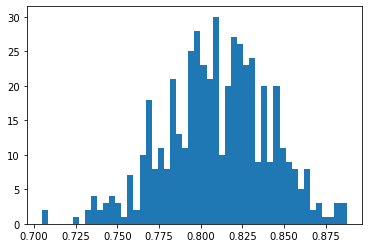

In [36]:
plt.hist(auc_bootstrap_LR['test_9'], bins=50)

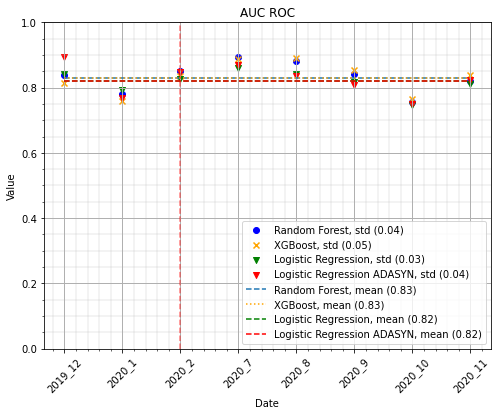

In [20]:
xaxis = ['2019_12','2020_1', '2020_2', '2020_7', '2020_8', '2020_9', '2020_10', '2020_11']
timeplot(xaxis, AUC_RF, AUC_xgb, AUC_LR, AUC_LR_ada, "./figures/TimeAUC.png", 'AUC ROC')

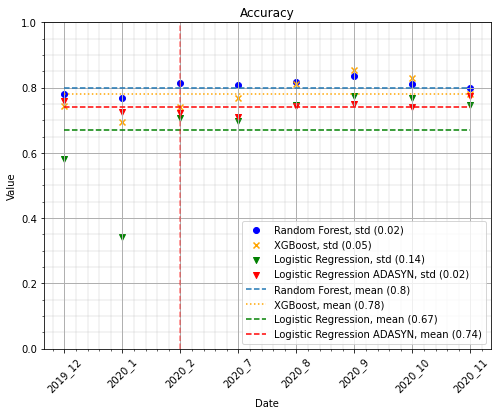

In [21]:
timeplot(xaxis, Accuracyvalue_RF, Accuracyvalue_xgb, Accuracyvalue_LR,Accuracyvalue_LR_ada, "./figures/TimeAccuracy.png", 
         'Accuracy')

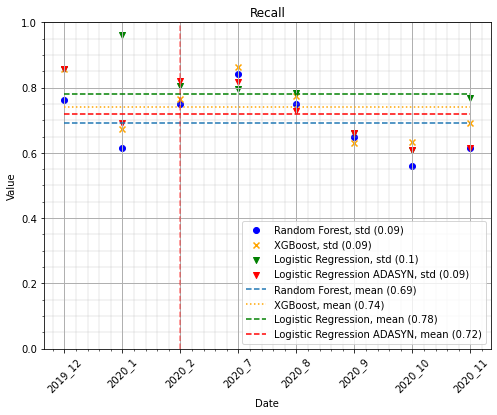

In [12]:
timeplot(xaxis, Recallvalue_RF, Recallvalue_xgb, Recallvalue_LR, Recallvalue_LR_ada, "./figures/TimeRecall.png", 
         'Recall')

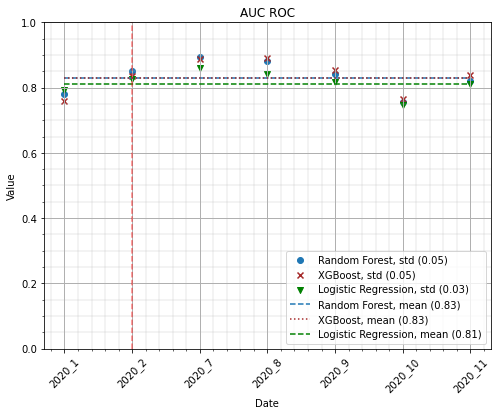

In [13]:
xaxis = ['2019_12','2020_1', '2020_2', '2020_7', '2020_8', '2020_9', '2020_10', '2020_11']
timeplot(xaxis[1:], AUC_RF[1:], AUC_xgb[1:], AUC_LR[1:], "./figures/TimeAUC_1.png", 'AUC ROC')

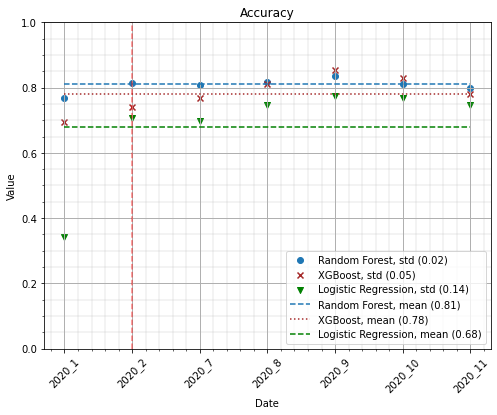

In [14]:
timeplot(xaxis[1:], Accuracyvalue_RF[1:], Accuracyvalue_xgb[1:], Accuracyvalue_LR[1:], "./figures/TimeAccuracy_1.png", 
         'Accuracy')

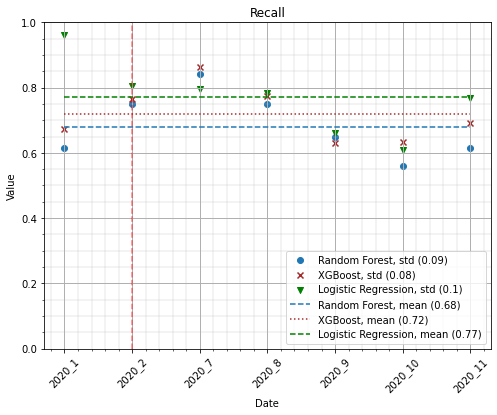

In [15]:
timeplot(xaxis[1:], Recallvalue_RF[1:], Recallvalue_xgb[1:], Recallvalue_LR[1:], "./figures/TimeRecall_1.png", 
         'Recall')

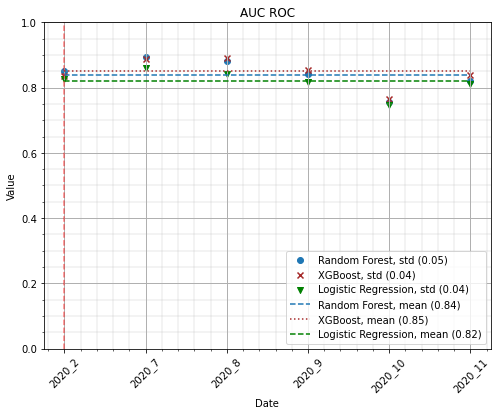

In [16]:
xaxis = ['2019_12','2020_1', '2020_2', '2020_7', '2020_8', '2020_9', '2020_10', '2020_11']
timeplot(xaxis[2:], AUC_RF[2:], AUC_xgb[2:], AUC_LR[2:], "./figures/TimeAUC_2.png", 'AUC ROC')

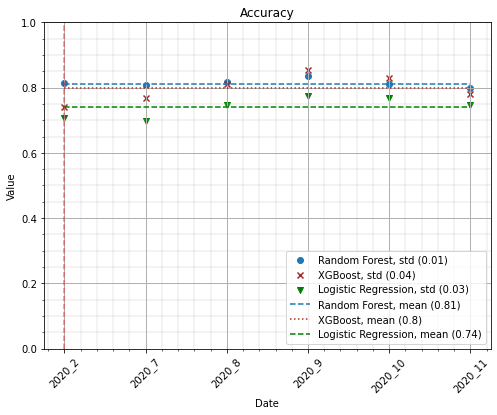

In [17]:
timeplot(xaxis[2:], Accuracyvalue_RF[2:], Accuracyvalue_xgb[2:], Accuracyvalue_LR[2:], "./figures/TimeAccuracy_2.png", 
         'Accuracy')

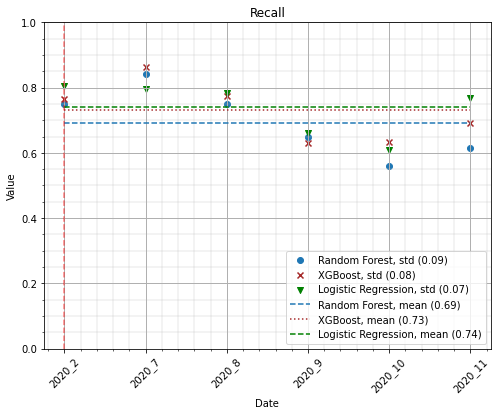

In [18]:
timeplot(xaxis[2:], Recallvalue_RF[2:], Recallvalue_xgb[2:], Recallvalue_LR[2:], "./figures/TimeRecall_2.png", 
         'Recall')

In [38]:
import pandas as pd
import numpy as np

data2019 = pd.read_csv("./FullData2019.csv")
data2019 = data2019.drop_duplicates('hhid').reset_index(drop=True)
data2016 = pd.read_csv("./FullData2016.csv")
def FCSStaus(val):
    if val <=35:
        return 1
    else:
        return 0
# create the binary food insecurity indicator
data2019['FCSStaus'] = data2019['FCS'].apply(FCSStaus)
data2016['FCSStaus'] = data2016['FCS'].apply(FCSStaus)
# create a lagged FCS
data2016['dismerge'] = data2016['s1aq2a'].str.upper()
mg2016 = data2016[['FCSStaus','dismerge']].groupby('dismerge').mean().reset_index()
mg2016.rename(columns={'dismerge':'s1aq2a', 'FCSStaus':'FCSStaus_lag'}, inplace=True)
data2019['FCSStaus_lag'] = pd.merge(data2019, mg2016, on='s1aq2a', how='left')['FCSStaus_lag']

# imputation for NA, with mode  
individual = ['HouseType', 'RoofType', 'WaterSource',
       'DistDrinkingWater', 'ShareToilet', 'Income', 'Kind Income Ratio', 'Salt', 'SubjectivePoverty', 'RelLivStandard',
       'IncomeStab', 'LivStandChange','MaleRatio', 'AvgAge', 'SelfArg', 'SelfHerd',
       'OwnNow_ArgLand', 'valueNow_ArgLand', 'Own1yrAgo_ArgLand',
       'ValueAgo_ArgLand', 'OwnNow_TV', 'valueNow_TV', 'Own1yrAgo_TV',
       'ValueAgo_TV', 'OwnNow_FixPhone', 'valueNow_FixPhone',
       'Own1yrAgo_FixPhone', 'ValueAgo_FixPhone', 'OwnNow_MobilePhone',
       'valueNow_MobilePhone', 'Own1yrAgo_MobilePhone', 'ValueAgo_MobilePhone','OwnNow_Refrigerator', 'valueNow_Refrigerator',
       'Own1yrAgo_Refrigerator', 'ValueAgo_Refrigerator', 'OwnNow_Furniture',
       'valueNow_Furniture', 'Own1yrAgo_Furniture', 'ValueAgo_Furniture','OwnNow_Cooker', 'valueNow_Cooker', 'Own1yrAgo_Cooker',
       'ValueAgo_Cooker', 'OwnNow_Livestock', 'valueNow_Livestock','Own1yrAgo_Livestock', 'ValueAgo_Livestock','valueNowTotal',
       'ValueAgoTotal','FamilySize','SelfStapleTypes','FCSStaus_lag'] # ShareToilet and Salt are dummies 

for i in individual: 
    # data2016[i].fillna(data2016[i].mode()[0],inplace=True)
    data2019[i].fillna(data2019[i].mode()[0],inplace=True)
# wkd2016 = pd.get_dummies(data2016,columns=["ShareToilet","Salt"])
wkd2019 = pd.get_dummies(data2019,columns=["ShareToilet","Salt"])
wkd2019_2 = pd.get_dummies(wkd2019,columns=["IncomeStab",'SubjectivePoverty', 'RelLivStandard','LivStandChange'])
# frequency encoding 
# freq = ['HouseType', 'RoofType', 'WaterSource',
#        'DistDrinkingWater', 'SubjectivePoverty', 'RelLivStandard',
#        'IncomeStab', 'LivStandChange']
freq = ['HouseType', 'RoofType', 'WaterSource']

wkd2019_2['DistDrinkingWaterBig3'] = wkd2019_2['DistDrinkingWater'].replace({'0-3':0, "3-5":1, "5-8":1,'8 or more KMs':1 })
# for i in freq: 
#     freqf = data2016.groupby(i).size()/len(data2016)
#     wkd2016[f"{i}_feq"] = wkd2016[i].apply(lambda x : freqf[x])
for j in freq: 
    freqf = wkd2019_2.groupby(j).size()/len(wkd2019_2)
    wkd2019_2[f"{j}_feq"] = wkd2019_2[j].apply(lambda x : freqf[x])
    
wkd2019_2['fatalitiesMean'] = wkd2019_2[['fatalities', 'fatalities lag1', 'fatalities lag2', 'fatalities lag3',
       'fatalities lag4']].sum(axis=1)
wkd2019_2['temperatureMean'] = wkd2019_2[['temperature', 'temperature lag1',
       'temperature lag2', 'temperature lag3', 'temperature lag4']].mean(axis=1)
wkd2019_2['precipitationMean'] = wkd2019_2[['precipitation', 'precipitation lag1', 'precipitation lag2',
       'precipitation lag3', 'precipitation lag4']].mean(axis=1)
wkd2019_2['NDVIMean'] = wkd2019_2[['NDVI', 'NDVI lag1', 'NDVI lag2', 'NDVI lag3', 'NDVI lag4']].mean(axis=1)
wkd2019_2['NDVI Anomaly Mean'] = wkd2019_2[['NDVI Anomaly',
       'NDVI Anomaly lag1', 'NDVI Anomaly lag2', 'NDVI Anomaly lag3',
       'NDVI Anomaly lag4']].mean(axis=1)

# feature engineering ( inspired by my friend Mr Chang)
value_list = ['valueNow_ArgLand', "Income", 
       'valueNow_TV', 'valueNow_FixPhone',  'valueNow_MobilePhone', 'valueNow_Refrigerator', 'valueNow_Furniture', 
       'valueNow_Cooker', 'valueNow_Livestock', 'valueNowTotal', 'ValueAgoTotal']
value_list_new = [f'{i}_new' for i in value_list]
wkd2019_2[value_list_new] = np.log(wkd2019_2[value_list] + 1)*10
wkd2019_2['FamilySize_new'] =  np.log(wkd2019_2['FamilySize'])*10
wkd2019_2['SelfStapleTypes_new'] =  np.log(wkd2019_2['SelfStapleTypes'] + 1)*10

macrologList = ['NL_District', 'fatalitiesMean', 'temperatureMean',
       'precipitationMean', 'NDVIMean', 'NDVI Anomaly Mean', 'Kind Income Ratio', 
       'Average (mm)', '1 Month Anomaly (%)', '3 Months Anomaly (%)','MaleRatio', 'AvgAge' ]
macrologList_new = [f'{i}_log' for i in macrologList]
wkd2019_2[macrologList_new] = np.log(wkd2019_2[macrologList]+1)*10

time_splitted_data_1920 = { }

for y in [2019, 2020]:
    for m in range(1,13):
        if wkd2019_2.query("year == @y and month == @m").shape[0] != 0: 
            time_splitted_data_1920[f"{y}_{m}"] = wkd2019_2.query("year == @y and month == @m").reset_index(drop = True)
        else: 
            continue 

<AxesSubplot:>

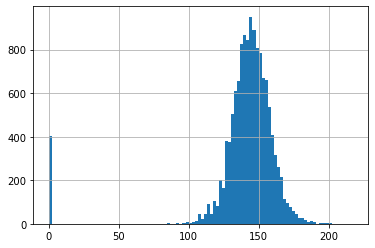

In [50]:
wkd2019_2['Income_new'].hist(bins=100)

In [39]:
predictorList = ['FCSStaus_lag', 'urban','NL_District_log', 
       'precipitationMean', 'NDVI Anomaly Mean',
       'Average (mm)',  '1 Month Anomaly (%)', '3 Months Anomaly (%)', 
       'fatalitiesMean_log','temperatureMean_log','NDVIMean_log',
       'Kind Income Ratio','MaleRatio', 'AvgAge', 'SelfArg', 'SelfHerd', 'ShareToilet_Yes', 'Salt_Yes',
       'HouseType_feq', 'RoofType_feq', 'WaterSource_feq', 'IncomeStab_Somewhat stable',
       'IncomeStab_Very unstable',
       'SubjectivePoverty_Neither poor nor rich', 'SubjectivePoverty_Poor',
       'SubjectivePoverty_Very poor', 'RelLivStandard_Better off',
       'RelLivStandard_Same', 'RelLivStandard_Worse off',
       'LivStandChange_Decreased', 'LivStandChange_Increased',
       'LivStandChange_Stayed at the same', 'DistDrinkingWaterBig3', 'FamilySize', 
       'SelfStapleTypes', 'valueNow_MobilePhone', 'valueNowTotal', 'valueNow_Furniture', 
        'valueNow_MobilePhone_new', 'valueNow_ArgLand_new', 'valueNow_ArgLand', 'valueNow_Livestock', 
       'valueNow_Furniture_new', 'valueNow_Livestock_new', 'valueNowTotal_new', 'Income_new', 'Income', 
       'ValueAgoTotal_new', 'valueNow_FixPhone',  
       'valueNow_Refrigerator']

binaryList = ['urban','Salt_Yes','ShareToilet_Yes','SelfArg', 'SelfHerd', 'IncomeStab_Somewhat stable',
       'IncomeStab_Very unstable','SubjectivePoverty_Neither poor nor rich', 'SubjectivePoverty_Poor',
       'SubjectivePoverty_Very poor', 'RelLivStandard_Better off',
       'RelLivStandard_Same', 'RelLivStandard_Worse off',
       'LivStandChange_Decreased', 'LivStandChange_Increased', 
       'LivStandChange_Stayed at the same','DistDrinkingWaterBig3']

freqList = [f"{i}_feq" for i in freq]

# nonstdList = ['valueNow_ArgLand_new', 'valueNow_TV_new', 'valueNow_FixPhone_new',
#        'valueNow_MobilePhone_new', 'valueNow_Refrigerator_new',
#        'valueNow_Furniture_new', 'valueNow_Cooker_new',
#        'valueNow_Livestock_new', 'valueNowTotal_new', 'FamilySize_new',
#        'SelfStapleTypes_new']

nonstdList = []

standardizationList = list(set(predictorList) - set(binaryList) - set(freqList) - set(nonstdList))